### 1. Read "Microclimate sensors data" and print the feature name with the number of missing entries. 

In [1]:
### 1.Read "Microclimate sensors data" and print the feature name with numbers of missing entries. 
import pandas as pd

main_data = pd.read_csv("microclimate-sensors-data.csv")
df = main_data
#print(df.head())
#print(df.describe())
missing_values = df.isnull().sum()
print("Feature name with numbers of missing entries:")
print(missing_values)


Feature name with numbers of missing entries:
Device_id                   0
Time                        0
SensorLocation           6143
LatLong                 11483
MinimumWindDirection    39607
AverageWindDirection      503
MaximumWindDirection    39765
MinimumWindSpeed        39765
AverageWindSpeed          503
GustWindSpeed           39765
AirTemperature            503
RelativeHumidity          503
AtmosphericPressure       503
PM25                    18899
PM10                    18899
Noise                   18899
dtype: int64


### 2. Fill in the missing entries.

In [2]:
### Analyze the Categorical Features
# Step 1: Find the mode SensorLocation
mode_location = df['SensorLocation'].mode()[0]
# Step 2: Find the LatLong for this mode_location (most common one if multiple)
latlong_for_mode_location = (
    df[df['SensorLocation'] == mode_location]['LatLong']
    .dropna()
    .mode()[0]
)

df['SensorLocation'] = df['SensorLocation'].fillna(mode_location)
df['LatLong'] = df['LatLong'].fillna(latlong_for_mode_location)


In [3]:
### Analyze the Numerical Features
# Select numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

mean_features = []
median_features = []

# Analyze each numeric feature
for col in numeric_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        skewness = df[col].skew()
        mean_val = df[col].mean()
        median_val = df[col].median()

        # Decide whether to use mean or median and put the data in a dictionary
        if abs(skewness) < 0.5:
            strategy = "Mean ( normal distribution)"
            fill_val = mean_val
            mean_features.append({
                "features": col,
                "missing": round(missing_count, 2),
                "skew": round(skewness, 2),
                "mean": round(mean_val, 2),
                "median_val": round(median_val, 2),
                "strategy": strategy,
                "replacement_val": round(fill_val, 2)
            })
        else:
            strategy = "Median (skewed or has outliers)"
            fill_val = median_val
            median_features.append({
                "features": col,
                "missing": round(missing_count, 2),
                "skew": round(skewness, 2),
                "mean": round(mean_val, 2),
                "median_val": round(median_val, 2),
                "strategy": strategy,
                "replacement_val": round(fill_val, 2)
            })

# Convert to DataFrames 
mean_df = pd.DataFrame(mean_features)
median_df = pd.DataFrame(median_features)

# Print tables
print("\nFeatures filled using ----------------MEAN----------------------------------")
print(mean_df.to_string(index=False))

print("\nFeatures filled using ----------------MEDIAN--------------------------------")
print(median_df.to_string(index=False))




Features filled using ----------------MEAN----------------------------------
            features  missing  skew   mean  median_val                    strategy  replacement_val
AverageWindDirection      503  0.16 166.59       159.0 Mean ( normal distribution)           166.59

Features filled using ----------------MEDIAN--------------------------------
            features  missing  skew    mean  median_val                        strategy  replacement_val
MinimumWindDirection    39607  3.20   20.47         0.0 Median (skewed or has outliers)              0.0
MaximumWindDirection    39765 -1.83  305.44       353.0 Median (skewed or has outliers)            353.0
    MinimumWindSpeed    39765  8.58    4.77         0.0 Median (skewed or has outliers)              0.0
    AverageWindSpeed      503  1.68    1.06         0.8 Median (skewed or has outliers)              0.8
       GustWindSpeed    39765  1.70    3.44         2.8 Median (skewed or has outliers)              2.8
      AirTempe

In [4]:
### 2. Fill in the missing entries. For filling  features, I used the mean or median value of the feature values from observed entries.
# Merge both feature lists
all_imputations = mean_features + median_features

# Create dictionary for filling
fill_dict = {item['features']: item['replacement_val'] for item in all_imputations}

# Impute missing values
df.fillna(value=fill_dict, inplace=True)

# Confirm is there any null value or not
print("\nRemaining missing values:")
print(df.isnull().sum())


Remaining missing values:
Device_id               0
Time                    0
SensorLocation          0
LatLong                 0
MinimumWindDirection    0
AverageWindDirection    0
MaximumWindDirection    0
MinimumWindSpeed        0
AverageWindSpeed        0
GustWindSpeed           0
AirTemperature          0
RelativeHumidity        0
AtmosphericPressure     0
PM25                    0
PM10                    0
Noise                   0
dtype: int64


### Explaination the reason behind my choice

I analyzed each numeric feature's distribution shape using skewness.

1. If a feature was approximately normally distributed (|skew| < 0.5), I used the mean to fill missing values, since it accurately represents the central value.

2. If the feature was skewed or had outliers, I used the median, which is more robust and avoids distortion from extreme values.

This dynamic imputation ensures that missing data is filled in a way that best preserves the integrity and shape of the original distribution.


### 3. Histogram to show the distribution of the variable “PM25” and “PM10”.

PM2.5......Mean: 19.19738285093993 median: 3.0 Skew: 8.432939573137432 Std: 115.11422324378752
PM10.......Mean: 7.976418013411653 median: 5.0 Skew: 8.713265167029615 Std: 12.205366003202283


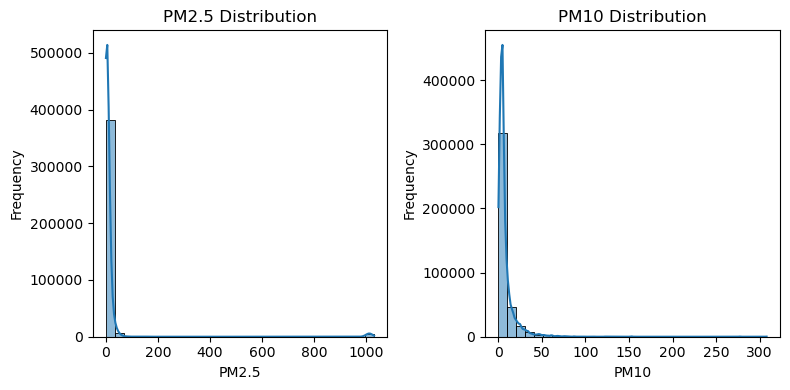

In [5]:
### Distribution of the variable PM2.5 and PM10
import matplotlib.pyplot as plt
import seaborn as sns

print("PM2.5......Mean:",df['PM25'].mean(),"median:",df['PM25'].median(),"Skew:",df['PM25'].skew(),"Std:",df['PM25'].std())
print("PM10.......Mean:",df['PM10'].mean(),"median:",df['PM10'].median(),"Skew:",df['PM10'].skew(),"Std:",df['PM10'].std())

plt.figure(figsize=(8,4))
#Plot PM25
plt.subplot(1,2,1)
sns.histplot(df['PM25'], bins=30, kde=True)
plt.title('PM2.5 Distribution')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')

#Plot PM10
plt.subplot(1,2,2)
sns.histplot(df['PM10'], bins=30, kde=True)
plt.title('PM10 Distribution')
plt.xlabel('PM10')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### PM2.5 Distribution
1. Highly right-skewed with a huge spike near 0.
2. A few values are extremely high (close to 1000 µg/m³), which are almost certainly outliers or sensor anomalies.
3. Most data lies below 50 µg/m³, with an exceptionally long tail.

### PM10 Distribution
1. Also right-skewed, but less extreme than PM2.5.
2. Most values are concentrated below 40 µg/m³.
3. There are some outliers extending beyond 300 µg/m³.

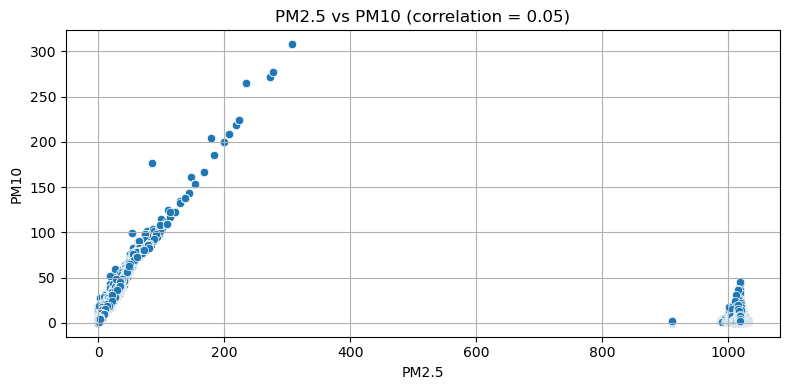

In [6]:
### 3. Calculate Correlation
correlation = df['PM25'].corr(df['PM10'])

#Plot scatterplot to visualize relationship
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='PM25', y='PM10')
plt.title(f"PM2.5 vs PM10 (correlation = {correlation:.2f})")
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.grid(True)
plt.tight_layout()
plt.show()

### Observation in Correlation

Correlation: 0.05 (very close to zero)
Indicates almost no linear relationship between PM2.5 and PM10 across the whole dataset.

There are two distinct clusters:

Cluster 1: Most values appear in a tight linear pattern up to about PM2.5 ≈ 300 and PM10 ≈ 300.
Suggests a strong positive relationship in this normal range.

Cluster 2: Around PM2.5 ≈ 1000 and PM10 ≈ 0–50
These are outliers or erroneous spikes, and they break the correlation.

### 4. Split the variable  “LatLong" using an appropriate encoding approach.

In [7]:
### 4.Split the variable  “LatLong" using an appropriate encoding approach

# Split 'LatLong' into numeric 'Latitude' and 'Longitude'
df[['Latitude', 'Longitude']] = df['LatLong'].str.split(',', expand=True).astype(float)

# Binning coordinates into 5 spatial zones
df['Lat_bin'] = pd.cut(df['Latitude'], bins=5, labels=False)
df['Lng_bin'] = pd.cut(df['Longitude'], bins=5, labels=False)

print(df[['LatLong','Latitude','Longitude','Lat_bin','Lng_bin']].head())


                    LatLong   Latitude   Longitude  Lat_bin  Lng_bin
0  -37.8184515, 144.9678474 -37.818452  144.967847        0        2
1   -37.812888, 144.9750857 -37.812888  144.975086        1        3
2  -37.8204083, 144.9591192 -37.820408  144.959119        0        1
3  -37.8185931, 144.9716404 -37.818593  144.971640        0        3
4  -37.8223306, 144.9521696 -37.822331  144.952170        0        0


### Justification of my selection of encoding approach.

1. LatLong is Not Categorical data.Although the LatLong values appear as strings (e.g., "–37.818, 144.967"), they represent continuous spatial coordinates, not discrete categories.

2. Label Encoding is Inappropriate. Label encoding assigns arbitrary integers (e.g., 0, 1, 2...) to unique LatLong pairs.This falsely implies ordinal relationships between geographic points (e.g., that label 3 > label 1), which is doesn't make sense in a spatial context.

3. One-Hot Encoding is inefficient, and One-hot encoding would create a binary column for each unique location.With potentially hundreds of unique coordinates, this leads to very high dimensionality, sparse matrices, and poor scalability for modeling.

Instead, I used a combination of latitude and longitude as numeric features, along with binning-based encoding to retain spatial structure in a model-friendly way. So, Latitude & Longitude as floats preserve true spatial relationships and binning-based encoding help group nearby points; reduce noise.

### 5. Apply the min-max scaling on continuous features.

In [8]:
### Apply the min-max scaling on continuous features. 
from sklearn.preprocessing import MinMaxScaler

continuous_features = df.select_dtypes(include=['float64', 'int64']).columns
# Create a scaler
scaler = MinMaxScaler()
# Fit and transform the continuous features
scaled_data = scaler.fit_transform(df[continuous_features])
# Create a DataFrame for scaled data
df_scaled = pd.DataFrame(scaled_data, columns=[f"{col}_scaled" for col in continuous_features])


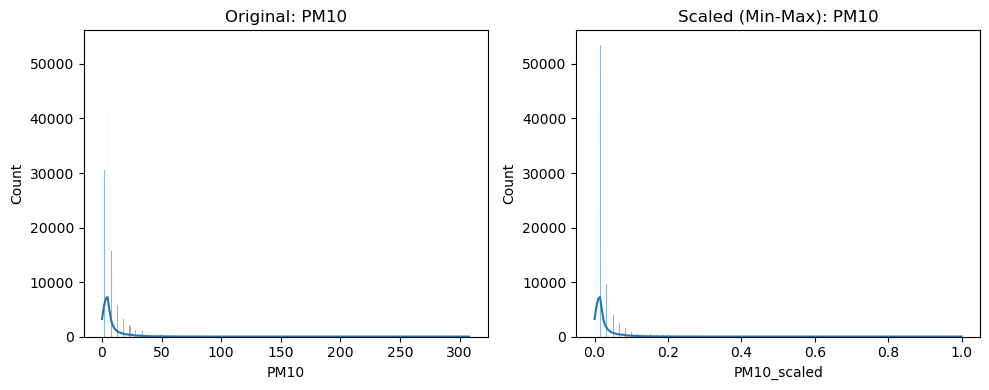

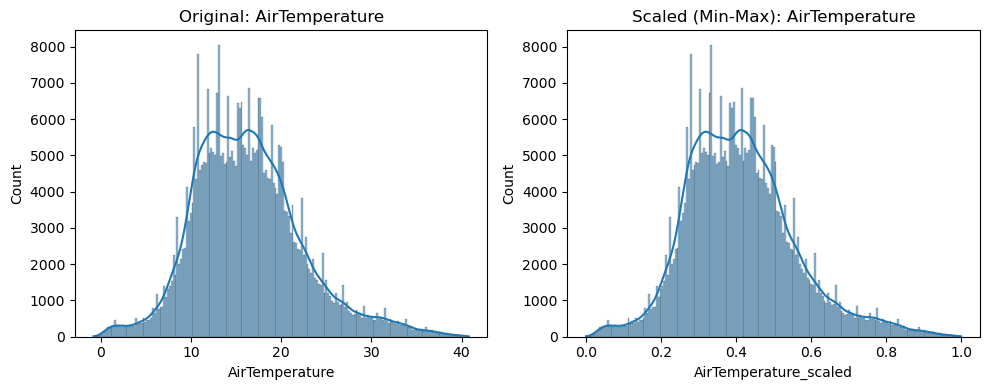

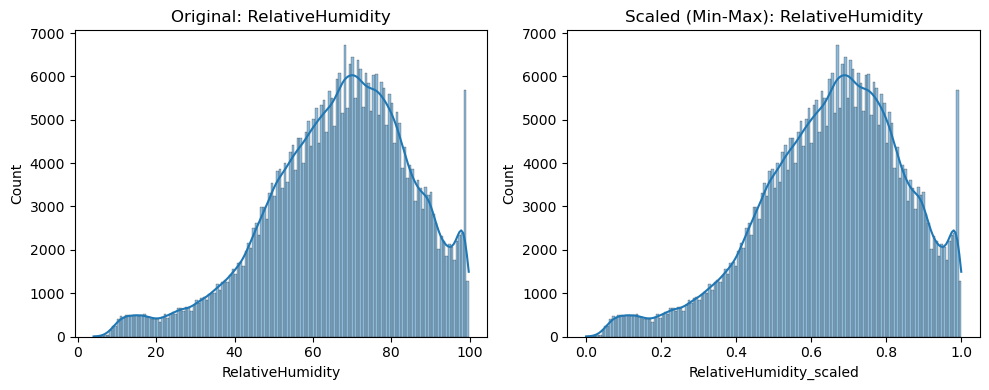

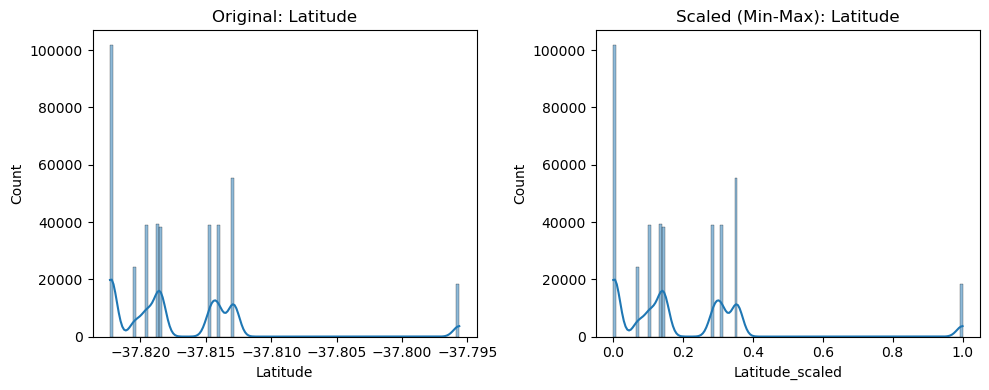

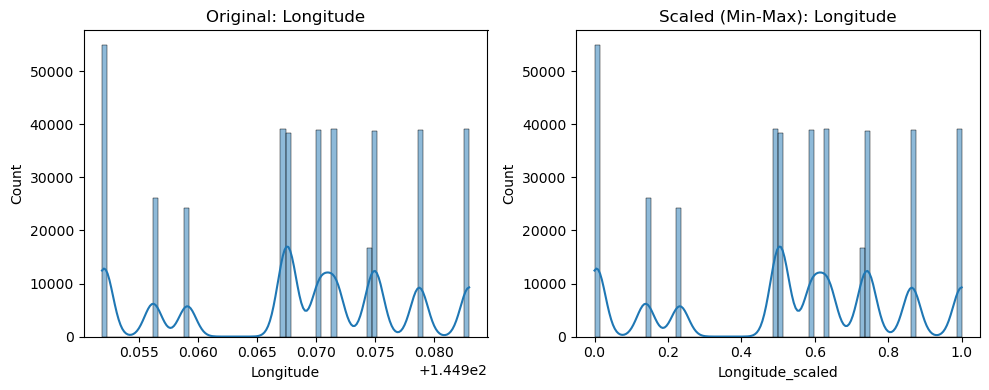

In [9]:
### Plot distribution of these features before and after scaling.

sample_features_to_plot = ['PM10', 'AirTemperature', 'RelativeHumidity','Latitude', 'Longitude']

for feature in sample_features_to_plot:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Original
    sns.histplot(df[feature].dropna(), kde=True, ax=axes[0])
    axes[0].set_title(f"Original: {feature}")
    
    # Scaled
    scaled_col = f"{feature}_scaled"
    sns.histplot(df_scaled[scaled_col].dropna(), kde=True, ax=axes[1])
    axes[1].set_title(f"Scaled (Min-Max): {feature}")
    
    plt.tight_layout()
    plt.show()

### Explanation of the difference
I applied Min-Max Scaling on the continuous features to rescale them into the range [0,1]. This transformation is helpful for many machine learning algorithms that are sensitive to the scale of input data, such as k-NN, SVMs, and neural networks.

To evaluate the effect of scaling, I plotted the distribution of each feature before and after scaling. Below are my observations:

1. The shape of the distributions remained the same before and after scaling.
2. Min-Max scaling only rescales the values; it does not change the underlying distribution (e.g., skewness, peaks, or spread).
    For example, in the case of MinimumWindDirection, the feature was highly skewed toward lower values before scaling, and this skewness remained even after scaling.
3. The scaling transformation simply shifts the minimum value to 0 and the maximum value to 1, compressing all other values proportionally within that range.

There is no change in the shape of the distribution after applying Min-Max scaling — only the scale of the feature values changes. This is expected behavior and confirms that Min-Max scaling is a linear transformation that preserves the original distribution's characteristics.